In [1]:
import contracts
contracts.disable_all()

In [2]:
import duckietown_uplan as uplan

INFO:dt-uplan:duckietown_uplan 1.0.0
INFO:dt-world:duckietown-world 1.0.19
DEBUG:dt-serialization:Registering class Serializable
DEBUG:dt-serialization:Registering class GenericData
DEBUG:dt-serialization:Registering class Sequence
DEBUG:dt-serialization:Registering class SampledSequence
DEBUG:dt-serialization:Registering class Constant
DEBUG:dt-serialization:Registering class RectangularArea
DEBUG:dt-serialization:Registering class TransformSequence
DEBUG:dt-serialization:Registering class VariableTransformSequence
DEBUG:dt-serialization:Registering class SE2Transform
DEBUG:dt-serialization:Registering class Scale2D
DEBUG:dt-serialization:Registering class Matrix2D
DEBUG:dt-serialization:Registering class SpatialRelation
DEBUG:dt-serialization:Registering class GroundTruth
DEBUG:dt-serialization:Registering class PlacedObject
DEBUG:dt-serialization:Registering class EvaluatedMetric
DEBUG:dt-serialization:Registering class GenericObject
DEBUG:dt-serialization:Registering class Duckie
D

In [3]:
import duckietown_world as dw
import numpy as np
np.random.seed(3)
current_map = dw.load_map('4way')
simulation_exp = uplan.ConstantProbabiltiySim(current_map, 1)
simulation_exp.execute_simulation(1)

INFO:dt-world:loading map 4way


Started move function
distance to travel:  0.25
distance to next control point is :  0.1570796326794896
reached a control point here
reached a control point here
reached a control point here


In [4]:
# simulation_exp.render_current_state()
path = simulation_exp.duckie_town.duckie_citizens[0].get_path()

In [5]:
def cost_function(delta_v_norm=0, delta_unc=0, unc=0, next_vel_norm=0, error_norm=0):
    
    a1 = 3
    a2 = 0
    a3 = 4
    a4 = 0
    a5 = 0.1
    
    sum_of_terms = a1*delta_v_norm**2 + a2*delta_unc + a3*unc**2 + \
        a4*next_vel_norm**2 + a5*error_norm**2
    return sum_of_terms

In [6]:
from duckietown_uplan.algo.velocity_profiler import VelocityProfiler
vel_prof = VelocityProfiler(10, 100, 10)
traj = vel_prof.get_velocity_profile(100, path, cost_function)
traj

delta_v_norm[0.0, 0.018541356326100378, 0.07279029772675571, 0.15872342839067294, 0.2699674811344239, 0.39827199347368303, 0.5341212066823354, 0.6674398060854931, 0.7883401610574335, 0.8878556453522098, 0.9586056507527264, 0.9953429730181653, 0.9953429730181653, 0.9586056507527265, 0.88785564535221, 0.7883401610574337, 0.6674398060854931, 0.5341212066823356, 0.39827199347368336, 0.2699674811344242, 0.15872342839067322, 0.07279029772675571, 0.018541356326100378, 0.0, 0.018541356326100322, 0.0727902977267556, 0.15872342839067272, 0.2699674811344236, 0.39827199347368314, 0.5341212066823354, 0.6674398060854929, 0.788340161057433, 0.8878556453522097, 0.9586056507527265, 0.9953429730181653, 0.9953429730181653, 0.9586056507527267, 0.88785564535221, 0.7883401610574341, 0.6674398060854934, 0.5341212066823362, 0.39827199347368347, 0.2699674811344239, 0.15872342839067333, 0.07279029772675577, 0.018541356326100544, 0.0]


[100.0,
 90.0,
 80.0,
 70.0,
 60.0,
 50.0,
 40.0,
 30.0,
 20.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 20.0,
 20.0,
 30.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 30.0,
 20.0,
 20.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 20.0,
 20.0,
 30.0,
 40.0,
 40.0,
 40.0]

Text(0, 0.5, 'Probability')

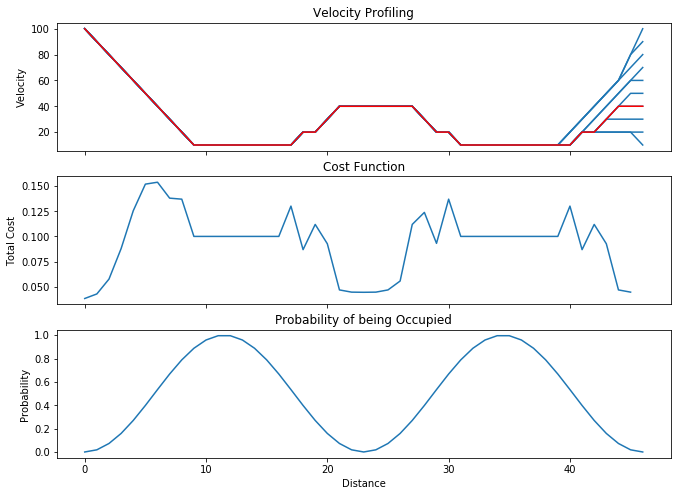

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

f = lambda x: 0.5 - 0.5*np.cos(x)
t = np.linspace(0, 4*np.pi, len(path))

uncertainties = [f(x) for x in t]


f, axarr = plt.subplots(3, sharex=True, figsize=(11, 8))
for cost, vels in vel_prof.trajectory_history:
    axarr[0].plot(vels, c='C0')
axarr[0].plot(traj, c='r')
axarr[0].set_title('Velocity Profiling')
axarr[0].set_ylabel("Velocity")
axarr[1].plot(vel_prof.cost_array)
axarr[1].set_title('Cost Function')
axarr[1].set_ylabel("Total Cost")
axarr[2].plot(uncertainties, c="C0")
axarr[2].set_title('Probability of being Occupied')
axarr[2].set_xlabel("Distance")
axarr[2].set_ylabel("Probability")





for i, j in vel_prof.vel_graph.edges():
    if i[0] == 0 and j[0] == 1:
        print(str(i)+str(j) +"_"+ str(vel_prof.vel_graph[i][j]))

In [8]:
def draw_graph(G0, pos=None):
    import networkx as nx
    from matplotlib import pyplot as plt
    pos = pos or nx.spring_layout(G0)
    plt.figure(figsize=(12, 12))    
    nx.draw(G0,pos,labels={node:node for node in G0.nodes()})
    def edge_label(a, b):
        datas = G0.get_edge_data(a, b)
        s = '%d edge%s' % (len(datas), 's' if len(datas)>=2 else '')
        for k, v in datas.items():
            if v:
                if 'label' in v:
                    s += '\n %s' % v['label']
                else:
                    s += '\n %s' %v
        return s
    #edge_labels = dict([ ((a,b), edge_label(a,b)) for a,b in G0.edges()])
    nx.draw_networkx_edge_labels(G0,pos,edge_labels=None,font_color='red')
    plt.axis('off')
    plt.show()

%matplotlib inline
import geometry as geo
pos = {}
for n in vel_prof.vel_graph:
    pos[n] = (n[0], n[1])
draw_graph(vel_prof.vel_graph, pos=pos)